In [105]:
%run myfuncs.py

In [106]:
from myfuncs import * 

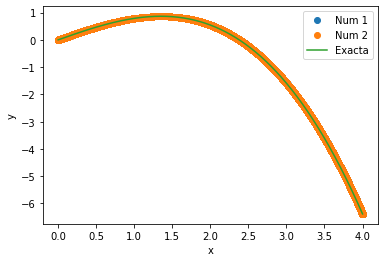

In [104]:
def F(y,x):
    F = zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F


# Instante inicial
x0 = 0.0
# Instante final
xStop = 4.0 
# Valores iniciales
y0 = array([0.0, 1.0]) 

# Tamaño del paso
h = 0.0001
# solución mediante el método de Euler
X,Y = euler(F,x0,y0,xStop,h)

# Solución exacta
yExact = 100.0*X - 5.0*X**2 + 990.0*(exp(-0.1*X) - 1.0)


#printSoln(X,Y,0,yExact)
x = arange (x0 ,xStop+h ,h)
y = odeint (fun , y0 , x)
dibujar(X,Y,y,yExact)


       x              y           Error     
  0.0000000000  1.0000000000  0.0000000000
  0.3000000000  0.9702000000  0.0142025182
  0.6000000000  0.8582777280  0.0230075166
  0.9000000000  0.6902818786  0.0233050678
  1.0000000000  0.6281565096  0.0216258498


0.024157352743909177

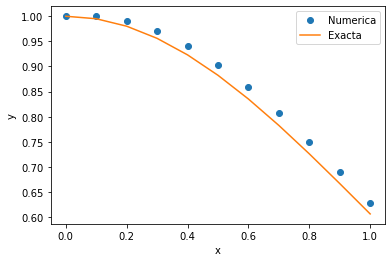

In [108]:
def F(y,x):
    F = -x*y
    return F
 
x0 = 0.
xStop = 1.
y0 = array([1.0])

h = 0.1
X, Y = euler(F,x0,y0,xStop,h)

yExact = exp(-X**2/2)

dibujar(X,Y,yExact)
printSoln(X,Y,3,yExact)


In [59]:
%run myfuncs.py


       x              y           Error     
  0.0000000000  2.0000000000  0.0000000000
  1.0000000000  1.7736972818  0.0240445499

       x              y           Error     
  0.0000000000  2.0000000000  0.0000000000
  1.0000000000  1.7496525782  0.0000001537


1.5365744032713735e-07

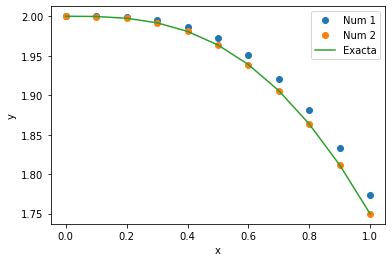

In [134]:
def F(y,x):
    F = 2*cos(x) - y
    return F
 
x0 = 0.
xStop = 1.
y0 = array([2.0])

h = 0.1
X, Y = euler(F,x0,y0,xStop,h)
yExact = exp(-X) + cos(X) + sin(X)
printSoln(X,Y,0,yExact)
X, Y2 = eulerModificado(F,x0,y0,xStop,h)
X, Y3 = medioPaso(F,x0,y0,xStop,h)

X, Y4 = odesolve(F,x0,y0,xStop,h)
dibujar(X,Y,Y4,yExact)

printSoln(X,Y4,0,yExact)

In [132]:
%run myfuncs.py